In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#load the excel file
data = pd.read_excel('Financial_data.xlsx')
#view the head of the data
#data.head(4)
df = pd.DataFrame(data)

## Question 1: 
####  Our CEO has asked if the discounts being offered to our Government customers and our small business customers should be substantially modified. What do you recommend?

To evaluate the impact of discounts on profitability, we grouped the sales data by customer segment and calculated the average discounts offered, total actual sales price, total profit made, and the profit margin (calculated as (Profit / Actual Sale Price) * 100). This helped us identify which segments are profitable and which are not, and how discounts affect profitability across segments.

In [2]:

#df = df[['To Whom? \nSegment of the customer','Discounts value offered', ' Actual Sale Price (After Discount)', "Profit made in this sale"]]
# Select relevant columns and rename them
df1 = df[[
    'To Whom? \nSegment of the customer',
    'Discounts value offered',
    ' Actual Sale Price (After Discount)',
    'Profit made in this sale'
]]

#Clean up column names before renaming
df1.columns = df1.columns.str.strip()  # Removes leading/trailing spaces
df1.columns = df1.columns.str.replace("\n", " ")  # Replace newline characters

# Now rename columns
df1 = df1.rename(columns={
    "To Whom?  Segment of the customer": "Segment of the customer",
    " Actual Sale Price (After Discount)": "Actual Sale Price (After Discount)"
})
# Print the DataFrame to verify
#df.columns
# Group by customer segment
segment_analysis = df1.groupby("Segment of the customer").agg({
    "Discounts value offered": "mean",
    "Actual Sale Price (After Discount)": "sum",
    "Profit made in this sale": "sum"
})

# Profit margin for each segment
segment_analysis["Profit Margin (%)"] = (segment_analysis["Profit made in this sale"] / 
                                     segment_analysis["Actual Sale Price (After Discount)"]) * 100

#segment_analysis



Channel Partners have the highest profit margin at 73.13% with very low average discounts of 1345.68, making them the most profitable segment. Enterprise customers, on the other hand, incur significant losses with a negative profit margin of -3.13%, driven by excessively high average discounts of 14573.06. Government customers show a moderate profit margin of 21.69% with discounts averaging 12996.02, indicating potential for further optimization. Midmarket customers maintain a healthy profit margin of 27.71% with low average discounts of 2007.87, demonstrating strong profitability and stability. Small Business customers have the lowest profit margin among profitable segments at 10.34%, primarily due to very high average discounts of 32397.81.

#### Conclusion
To improve overall profitability, discounts for Enterprise and Small Business customers must be significantly reduced. Channel Partners and Midmarket segments require no changes as they are highly profitable. For Government customers, slight reductions in discounts could further boost profitability.

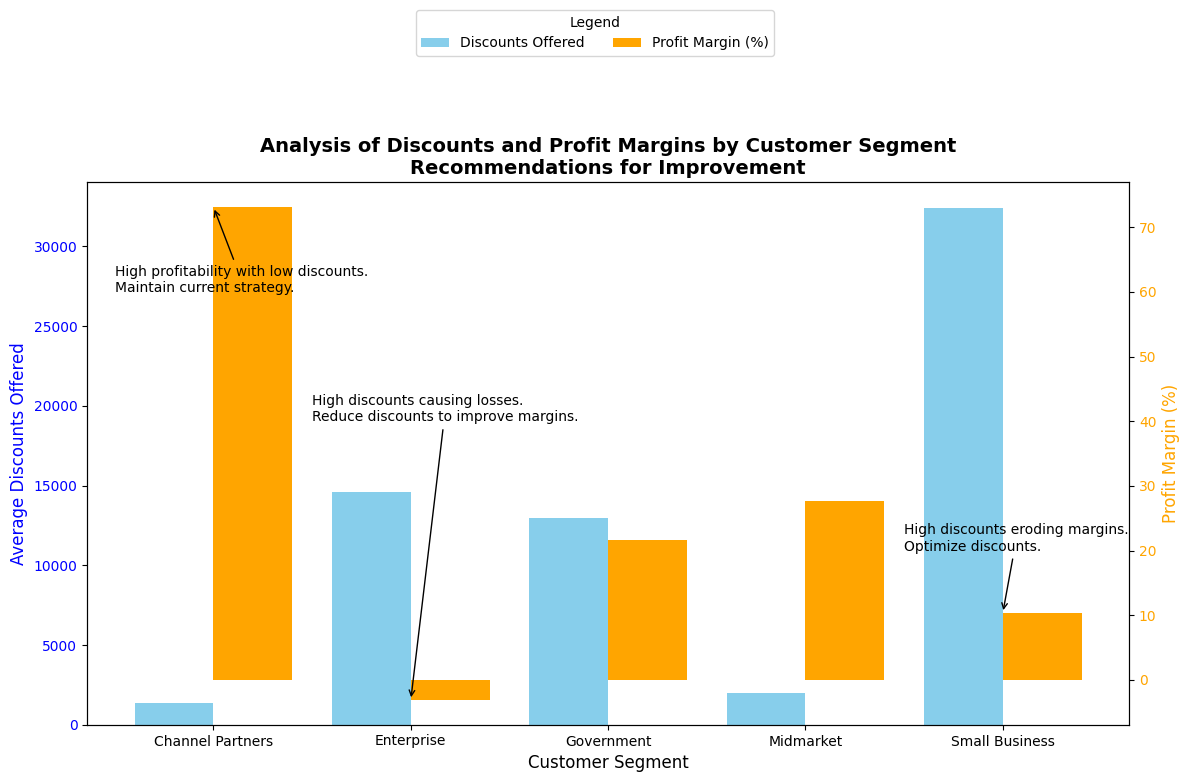

In [3]:
segment_analysis['Segment of the customer'] =  segment_analysis.index
# Ensure the x-axis values match the number of segments
x = np.arange(len(segment_analysis))  # x positions for bars

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot average discounts as bars
ax1.bar(x - 0.2, segment_analysis["Discounts value offered"], width=0.4, label="Discounts Offered", color="skyblue")
ax1.set_ylabel("Average Discounts Offered", fontsize=12, color="blue")
ax1.set_xlabel("Customer Segment", fontsize=12)
ax1.tick_params(axis='y', labelcolor="blue")

# Plot profit margins as bars on the same x-axis
ax2 = ax1.twinx()
ax2.bar(x + 0.2, segment_analysis["Profit Margin (%)"], width=0.4, label="Profit Margin (%)", color="orange")
ax2.set_ylabel("Profit Margin (%)", fontsize=12, color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

# Set x-axis labels
plt.xticks(x, segment_analysis["Segment of the customer"], rotation=45)

# Adjust legend outside the plot
fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2, title="Legend")

# Add recommendations as annotations
plt.annotate("High profitability with low discounts.\nMaintain current strategy.",
             xy=(0, segment_analysis["Profit Margin (%)"].iloc[0]), xytext=(-0.5, 60),
             arrowprops=dict(facecolor="black", arrowstyle="->"), fontsize=10, color="black")

plt.annotate("High discounts causing losses.\nReduce discounts to improve margins.",
             xy=(1, segment_analysis["Profit Margin (%)"].iloc[1]), xytext=(0.5, 40),
             arrowprops=dict(facecolor="black", arrowstyle="->"), fontsize=10, color="black")

plt.annotate("High discounts eroding margins.\nOptimize discounts.",
             xy=(4, segment_analysis["Profit Margin (%)"].iloc[4]), xytext=(3.5, 20),
             arrowprops=dict(facecolor="black", arrowstyle="->"), fontsize=10, color="black")

# Add a source text below the plot
#fig.text(0.5, -0.08, "Source: Internal Sales Data Analysis", ha="center", fontsize=10, color="gray")

# Title
plt.title("Analysis of Discounts and Profit Margins by Customer Segment\nRecommendations for Improvement", 
          fontsize=14, weight="bold")

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust margins for figtext and legend
plt.savefig("discounts_profit_analysis.png", bbox_inches='tight')
plt.show()


# Question 2:
Most small business start their financial year by early March. They do much of their purchasing (almost 60%) in the March-April period. Beyond this, small businesses have a very steady purchasing profile around the year, where their remaining 40% business is well-distributed around the year. For the purpose of this assignments, kindly accept this assumption for the behavior of all small business customers . 
Our market research experts are telling us that our small business customers are not doing their March-April peak period shopping with us at all. Are our small business customers doing their March-April peak period shopping with us? If not, do we need to do something to gain better business there?

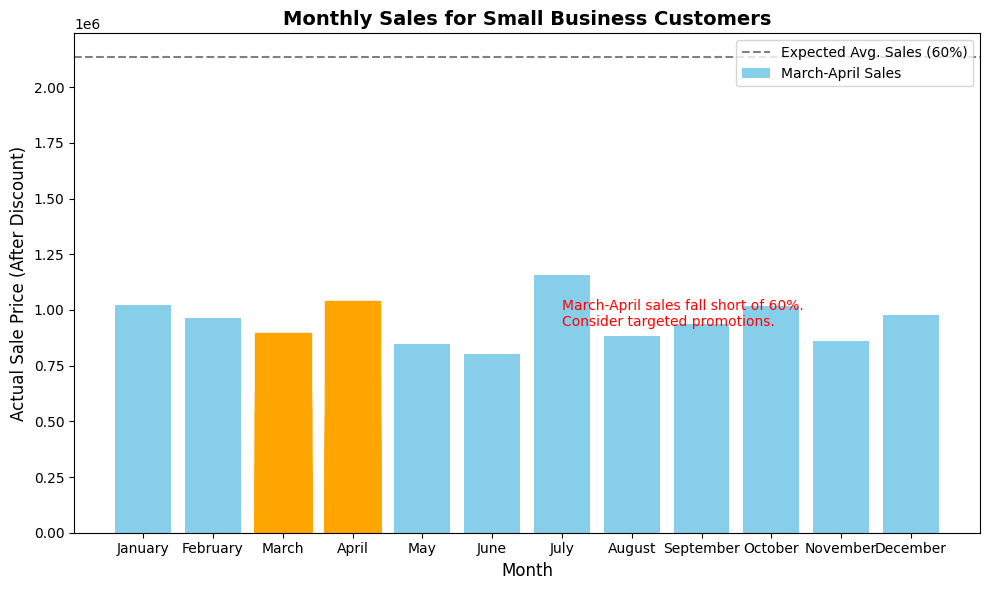

Total Sales for Small Business: 42701918.5
Sales during March-April: 5242101.5
March-April Sales Contribution: 12.28%
Small Business customers are NOT doing their peak March-April shopping with us.
Recommendation: Implement targeted promotions and discounts during March-April to attract more business.


In [4]:
df2 = df[[
    'To Whom? \nSegment of the customer',
    'Discounts value offered',
    ' Actual Sale Price (After Discount)',
    'Profit made in this sale',
    'Name of the month of the sale'
]]
#Clean up column names before renaming
df2.columns = df2.columns.str.strip()  # Removes leading/trailing spaces
df2.columns = df2.columns.str.replace("\n", " ")  # Replace newline characters

# Now rename columns
df2 = df2.rename(columns={
    "To Whom?  Segment of the customer": "Segment of the customer",
    " Actual Sale Price (After Discount)": "Actual Sale Price (After Discount)"
})

# Filter data for Small Business customers
small_business_data = df2[df2["Segment of the customer"] == "Small Business"]

# Total sales for Small Business customers
total_sales = small_business_data["Actual Sale Price (After Discount)"].sum()

# Sales during March and April
march_april_sales = small_business_data[
    small_business_data["Name of the month of the sale"].isin(["March", "April"])
]["Actual Sale Price (After Discount)"].sum()

# Calculate the percentage of March-April sales contribution
march_april_percentage = (march_april_sales / total_sales) * 100

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

df2["Name of the month of the sale"] = pd.Categorical(df2["Name of the month of the sale"], categories=month_order, ordered=True)

# Sort the DataFrame by month order
df2 = df2.sort_values("Name of the month of the sale")


# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df2["Name of the month of the sale"], df2["Actual Sale Price (After Discount)"], color="skyblue")

# Highlight March and April bars in a different color
for i, month in enumerate(df2["Name of the month of the sale"]):
    if month in ["March", "April"]:
        bars[i].set_color("orange")

# Add annotations
plt.title("Monthly Sales for Small Business Customers", fontsize=14, weight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Actual Sale Price (After Discount)", fontsize=12)
plt.axhline(y=total_sales * 0.6 / 12, color='gray', linestyle="--", label="Expected Avg. Sales (60%)")
plt.legend(["Expected Avg. Sales (60%)", "March-April Sales"], loc="upper right")

# Recommendation Annotation
if march_april_percentage < 60:
    plt.text(6, max(df2["Actual Sale Price (After Discount)"]) * 0.8,
             "March-April sales fall short of 60%.\nConsider targeted promotions.",
             fontsize=10, color="red")

# Show the plot
plt.tight_layout()
plt.savefig("small_business_sales_analysis.png", bbox_inches="tight")
plt.show()
# Print analysis results
print(f"Total Sales for Small Business: {total_sales}")
print(f"Sales during March-April: {march_april_sales}")
print(f"March-April Sales Contribution: {march_april_percentage:.2f}%")

# Check if March-April contribution meets the expected 60%
if march_april_percentage < 60:
    print("Small Business customers are NOT doing their peak March-April shopping with us.")
    print("Recommendation: Implement targeted promotions and discounts during March-April to attract more business.")
else:
    print("Small Business customers are doing their peak March-April shopping with us.")



# Question 3:
Our product sales head for Germany is Mr Andrés Manuel. He has been working with our "Velo" product since last 12 years. He wants to be transferred forever to Mexico for personal reasons. If not transferred, he will resign from the company. There is an existing product sales person named Jenny who has been handling "Velo" product in Mexico since last 5 years. Jenny is the daughter of our CFO and she has been with this company since long. She does not want any change in position. What do you suggest?

In [5]:
df3 = df[[
    'To Whom? \nSegment of the customer',
    'Where?  \nCountry of the customer',
    'Discounts value offered',
    ' Actual Sale Price (After Discount)',
    'Profit made in this sale',
    'WHAT?  \nProduct Sold',
    'No of Units Sold',
    'Year of sale'
    
]]
#Clean up column names before renaming

df3.columns = df3.columns.str.replace("\n", " ")  # Replace newline characters
df3.columns = df3.columns.str.strip()  # Removes leading/trailing spaces

# Now rename columns
df3 = df3.rename(columns={
    "To Whom?  Segment of the customer": "Segment of the customer",
    'Where?   Country of the customer': "Country of the customer",
    " Actual Sale Price (After Discount)": "Actual Sale Price (After Discount)",
      'WHAT?   Product Sold':  "Product Sold"
})
# Filter data for "Velo" product
velo_sales = df3[df3["Product Sold"] == "Velo"]

# Group by country to calculate total sales, profit, and average units sold
performance = velo_sales.groupby("Country of the customer").agg({
    "No of Units Sold": "mean",
    "Actual Sale Price (After Discount)": "sum",
    "Profit made in this sale": "sum"
}).rename(columns={
    "No of Units Sold": "Avg Units Sold",
    "Actual Sale Price (After Discount)": "Total Sales",
    "Profit made in this sale": "Total Profit"
}).reset_index()

# Display performance summary
print("Performance of 'Velo' Product in Germany and Mexico:")
# Yearly Trends for Germany and Mexico
germany_sales = velo_sales[velo_sales["Country of the customer"] == "Germany"]
mexico_sales = velo_sales[velo_sales["Country of the customer"] == "Mexico"]

# Summary of yearly trends
print("\nYearly Sales Trends in Germany:")
print(germany_sales.groupby("Year of sale").agg({"Actual Sale Price (After Discount)": "sum",
                                                 "Profit made in this sale": "sum"}))

print("\nYearly Sales Trends in Mexico:")
print(mexico_sales.groupby("Year of sale").agg({"Actual Sale Price (After Discount)": "sum",
                                                "Profit made in this sale": "sum"}))
# Group by Year and Country, aggregate total sales
yearly_sales = velo_sales.groupby(["Year of sale", "Country of the customer"]).agg({
    "Actual Sale Price (After Discount)": "sum"
}).reset_index()

# Pivot the data to create separate columns for Germany and Mexico
pivot_sales = yearly_sales.pivot(index="Year of sale", columns="Country of the customer", values="Actual Sale Price (After Discount)")

Performance of 'Velo' Product in Germany and Mexico:

Yearly Sales Trends in Germany:
              Actual Sale Price (After Discount)  Profit made in this sale
Year of sale                                                              
2021                                   1790278.3                  275558.3
2022                                   2602628.7                  513230.7

Yearly Sales Trends in Mexico:
              Actual Sale Price (After Discount)  Profit made in this sale
Year of sale                                                              
2021                                  1069230.15                  59150.15
2022                                  1181507.74                 114153.74


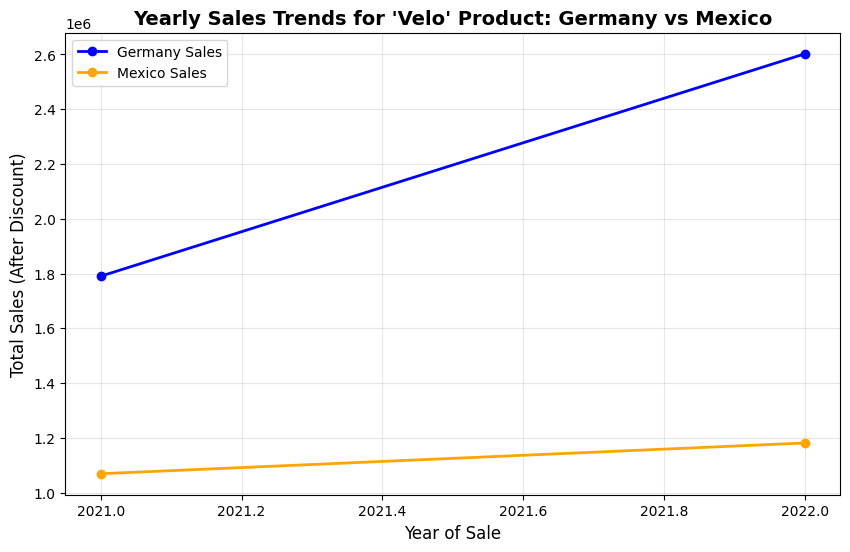

In [6]:

# Plot the cleaned-up sales trends
plt.figure(figsize=(10, 6))

# Plot sales trends for Germany and Mexico
plt.plot(pivot_sales.index, pivot_sales["Germany"], marker='o', label="Germany Sales", color='blue', linewidth=2)
plt.plot(pivot_sales.index, pivot_sales["Mexico"], marker='o', label="Mexico Sales", color='orange', linewidth=2)

# Add Titles and Labels
plt.title("Yearly Sales Trends for 'Velo' Product: Germany vs Mexico", fontsize=14, weight="bold")
plt.xlabel("Year of Sale", fontsize=12)
plt.ylabel("Total Sales (After Discount)", fontsize=12)
plt.legend(loc="upper left")
plt.savefig('saletrends_germany_mexico.png')
plt.grid(alpha=0.3)

## Analysis and conclusion:

To analyze the performance of the "Velo" product, I compared the yearly total sales in Germany and Mexico by aggregating the "Actual Sale Price (After Discount)" for each year. The data was grouped by country and year, and a line plot was created to visualize the sales trends over time.

The analysis shows that Germany significantly outperforms Mexico in sales for the "Velo" product, with total sales increasing from approximately 1.8 million in 2021 to 2.6 million in 2022 under Andrés Manuel's leadership. In contrast, Mexico's sales grew modestly from 1.05 million to 1.18 million, indicating slower progress under Jenny. The gap between the two regions widened further in 2022, with Germany's sales more than double those of Mexico. Andrés has demonstrated exceptional performance, driving strong growth in Germany, and his departure could pose a significant risk to maintaining this upward trend. Meanwhile, Mexico's performance, though stable, requires additional support and intervention. The recommendation is to retain Andrés in Germany while providing resources or mentorship to Jenny to boost Mexico's sales. A potential compromise could involve assigning Andrés to a regional oversight role for both markets to maximize his expertise while maintaining Jenny's position.